In [8]:
from data_structures import *
from helpers import *
import matplotlib.pyplot as plt
import numpy as np



In [9]:

def run_analysis(params, n = 30):

    nx, ny = n, n

    A, B = mdf_assemblage((0, params.L), (-params.H/2, params.H/2), nx, ny, params)
    T = np.linalg.solve(A, B)   # T de taille N = nx*ny

    x_mat, y_mat = position((0, params.L), (-params.H/2, params.H/2), nx, ny)
    T_mat = vecteur_en_matrice(T, nx, ny)

    #Construction de la matrice vitesses (x car vy est nul)
    U_mat = np.zeros((ny, nx))
    for i in range(ny):
        for j in range(nx):
            U_mat[i, j] = vitesse(x_mat[i, j], y_mat[i, j], params)[0]


    return Results(x_mat, y_mat, T_mat, U_mat)

In [10]:
def plot(Results, note = ''):
    plt.figure(figsize=(12, 5))
    niveaux = 50  # nombre de niveaux de contour
    cf = plt.contourf(Results.x_mat, Results.y_mat, Results.T_mat, levels=niveaux)
    plt.colorbar(cf, label="Température [K]")
    plt.xlabel("x [m]")
    plt.ylabel("y [m]")
    plt.title("Température dans la couche limite " + note)
    plt.tight_layout()
    plt.show()

    #Visulisation du champ de vitesse
    plt.figure(figsize=(12, 5))
    cf = plt.contourf(Results.x_mat, Results.y_mat, Results.U_mat, levels=niveaux)
    plt.colorbar(cf, label="Vitesse en x [m/s]")
    plt.xlabel("x [m]")
    plt.ylabel("y [m]")
    plt.title("Champ de vitesse en x dans la couche limite " + note)
    plt.tight_layout()
    plt.show()

In [11]:
# Définition des paramètres de base
params = Params(
    H = 0.001,
    mu = 0.001,
    rho = 1000,
    T_in = 298,
    T_w = 373,
    cp = 4186,
    k = 60,
    L = 1.0,
    U_in = 1.0,
    Ldev = 0.05
)

resultat = run_analysis(params, n=50)


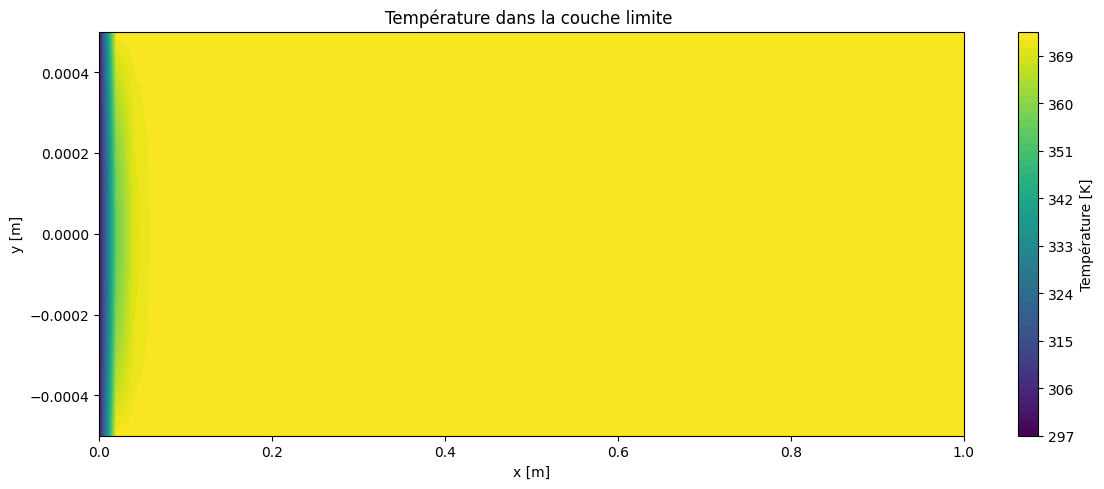

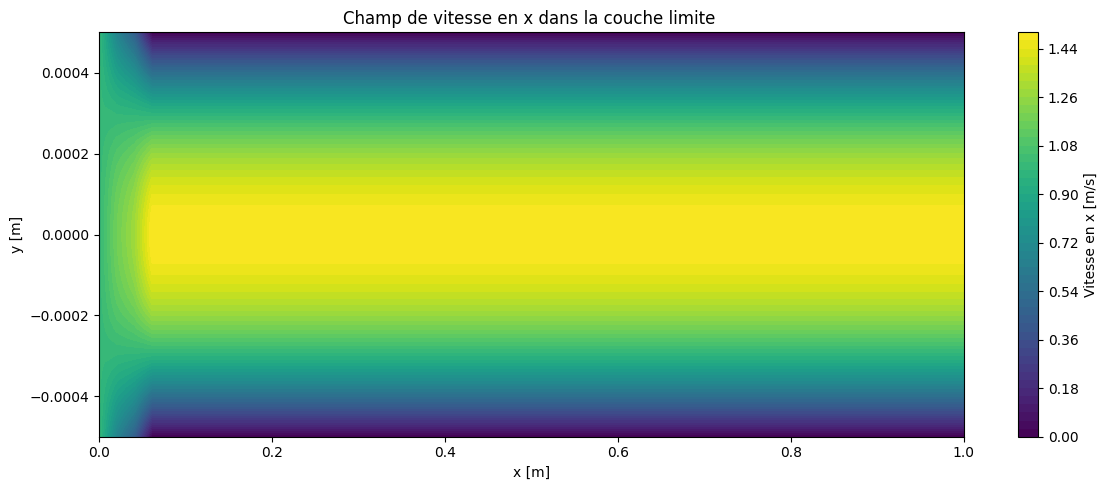

In [12]:
plot(resultat)

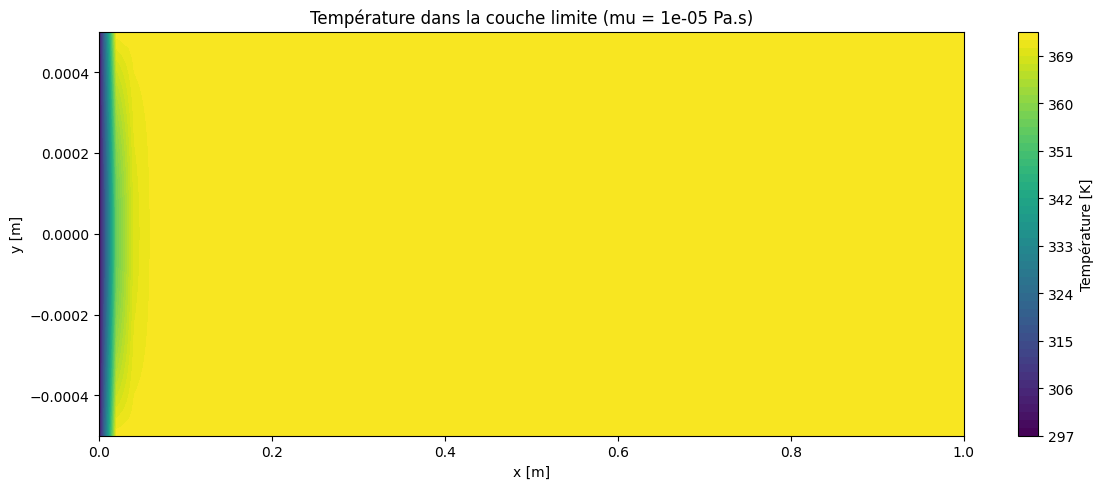

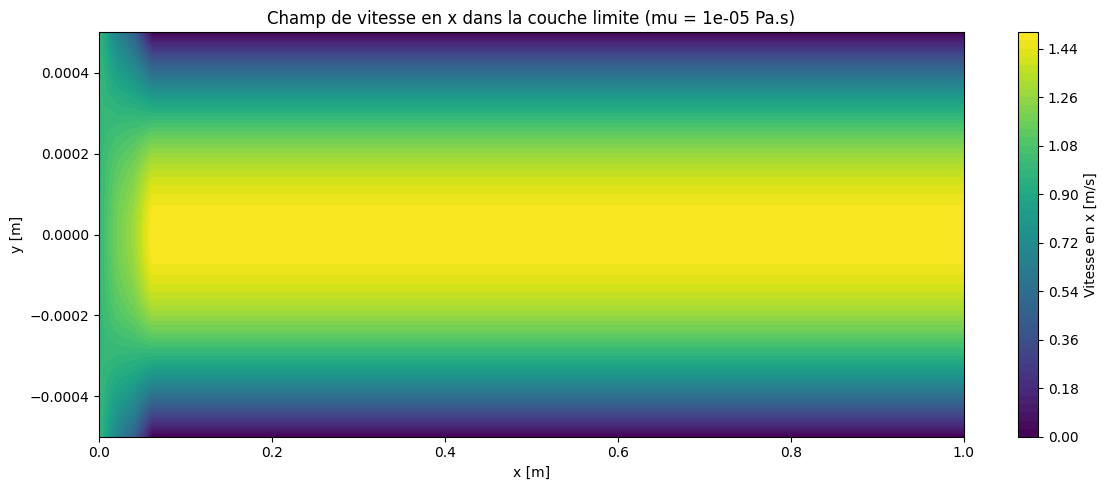

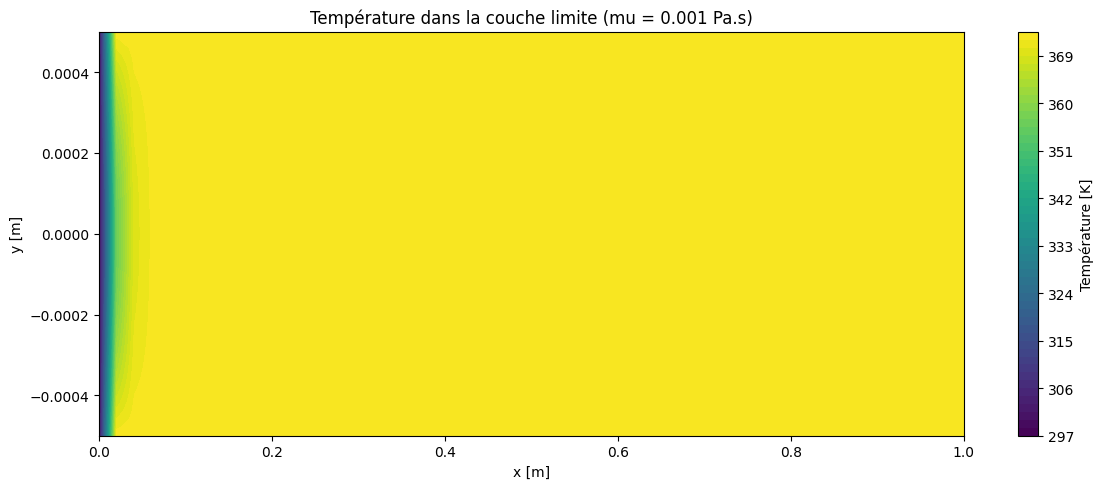

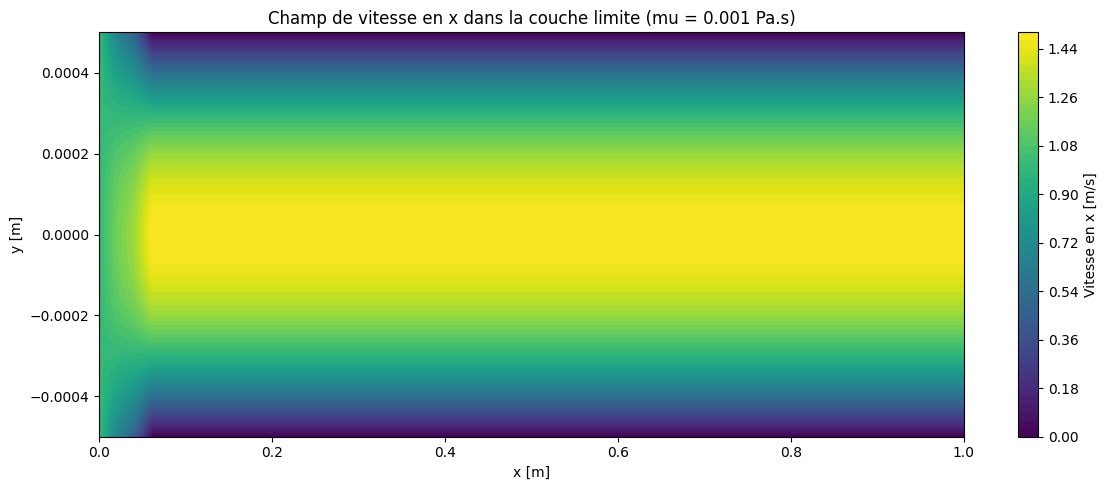

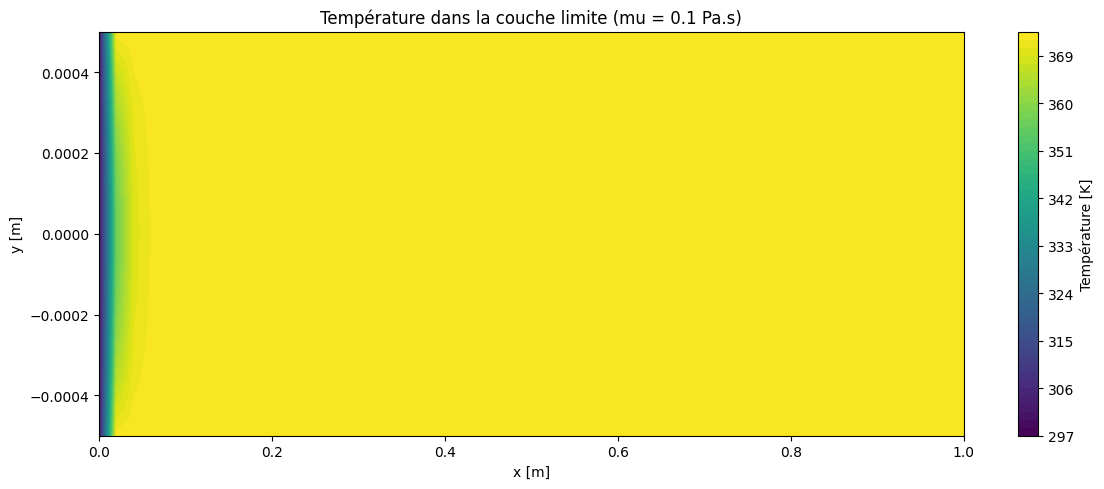

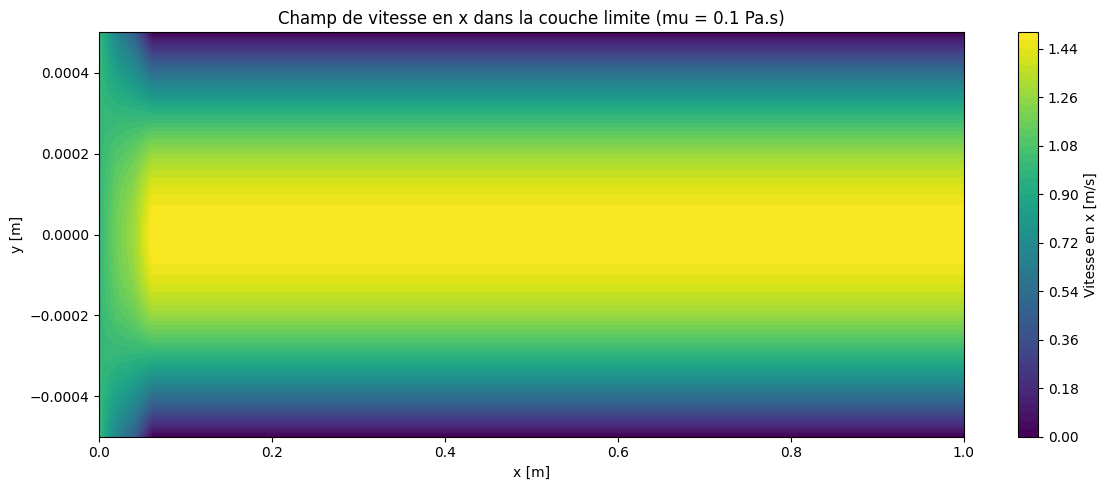

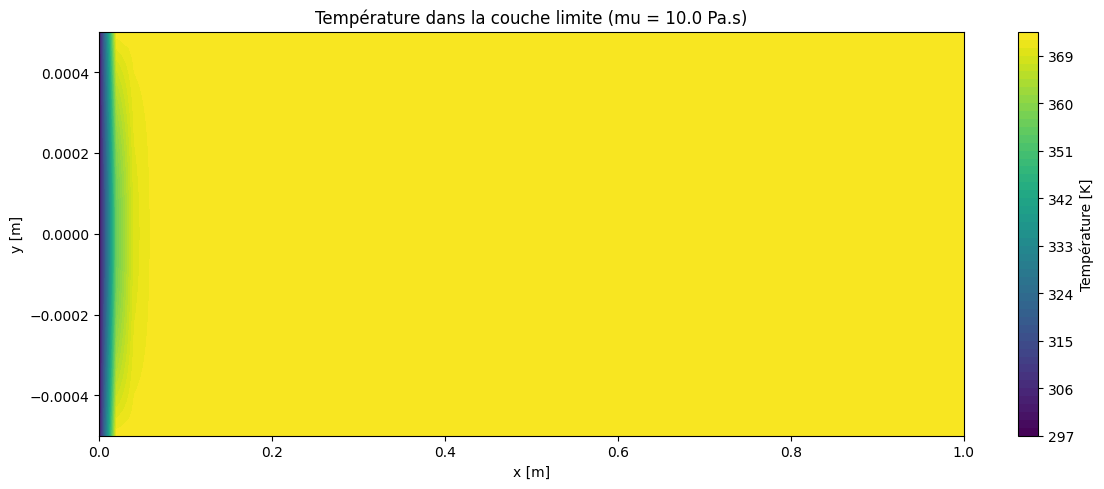

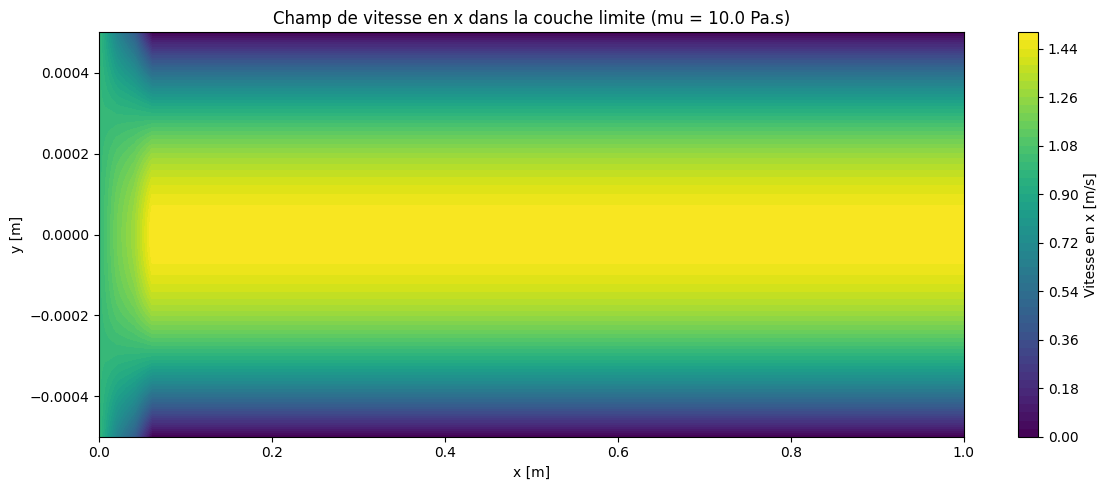

In [ ]:
params = Params(
    H = 0.001,
    mu = 0.001,
    rho = 1000,
    T_in = 298,
    T_w = 373,
    cp = 4186,
    k = 60,
    L = 1.0,
    U_in = 1.0,
    Ldev = 0.05
)

#Étude de l'influence du nombre de prant
#On choisi de faire varier mu
mu_vals = [0.00001, 0.001, 0.1, 10.0]

for mu in mu_vals:
    params.mu = mu
    
    resultat = run_analysis(params, n=50)
    note = f"(mu = {mu} Pa.s)"
    plot(resultat, note)